 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_path = Path("../Resources/whale_returns.csv")
algo_returns_path = Path("../Resources/algo_returns.csv")
sp500_history_path = Path("../Resources/sp500_history.csv")

#READ IN DATA, DATE-TIME FORMAT.
whale_returns_csv = pd.read_csv(whale_returns_path, parse_dates = True, infer_datetime_format=True)

In [3]:
# whale_returns_csv.head()

In [4]:
whale_returns_csv.sort_values("Date",inplace=True)

In [5]:
whale_returns_csv.set_index("Date", inplace=True)
# Count nulls (Whale Returns)
whale_returns_csv.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [6]:
# Drop nulls (Whale Returns)
whale_returns_csv.dropna(inplace=True)
whale_returns_csv.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [7]:
whale_analysis_csv = whale_returns_csv.loc['2014-06-05':]

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [8]:
algo_returns_csv = pd.read_csv(algo_returns_path, parse_dates = True, infer_datetime_format=True)

In [9]:
algo_returns_csv.sort_values("Date",inplace=True)

In [10]:
# algo_returns_csv.head()

In [11]:
#SET DATE AS INDEX
algo_returns_csv.set_index("Date", inplace=True)

In [12]:
# Count nulls
algo_returns_csv.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [13]:
# Drop nulls
algo_returns_csv.dropna(inplace=True)
algo_returns_csv.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [14]:
algo_returns_csv = algo_returns_csv.loc['2014-06-05':]

In [15]:
# algo_returns_csv.describe()

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [16]:
sp500_history_csv = pd.read_csv(sp500_history_path, parse_dates = True)

In [17]:
# sp500_history_csv.head()

In [18]:
#set date as the index, infer as date-time, drop date column.
sp500_history_csv.set_index(pd.to_datetime(sp500_history_csv["Date"], infer_datetime_format=True), inplace=True)
sp500_history_csv.drop(columns=["Date"], inplace= True)
# sp500_history_csv.head()

In [19]:
sp500_history_csv.isnull().sum()

Close    0
dtype: int64

In [20]:
# Check Data Types
sp500_history_csv.dtypes

Close    object
dtype: object

In [21]:
# Fix Data Types
sp500_history_csv["Close"] = sp500_history_csv["Close"].str.replace('$','')
sp500_history_csv["Close"] = sp500_history_csv["Close"].astype('float')
sp500_history_csv.dtypes

Close    float64
dtype: object

In [22]:
sp500_history_csv.sort_values("Date",inplace=True)

In [23]:
# Calculate Daily Returns
sp500_history_csv = (sp500_history_csv - sp500_history_csv.shift(1))/sp500_history_csv.shift(1)
# sp500_history_csv.head()

In [24]:
# Drop nulls
sp500_history_csv.dropna(inplace=True)
# sp500_history_csv.head()

In [25]:
# Rename Column
sp500_history_csv.rename(columns={"Close": "S&P500"}, inplace=True)
# sp500_history_csv.head()

In [26]:
sp500_history_csv = sp500_history_csv.loc['2014-06-05':]

In [27]:
sp500_history_csv.describe()

,S&P500
count,1229.000000
mean,0.000377
std,0.008410
min,-0.040979
25%,-0.002887
50%,0.000419
75%,0.004554
max,0.049594


In [28]:
algo_returns_csv.describe()

,Algo 1,Algo 2
count,1235.000000,1235.000000
mean,0.000654,0.000341
std,0.007988,0.008466
min,-0.030951,-0.036937
25%,-0.003252,-0.003733
50%,0.000094,0.000581
75%,0.003901,0.005194
max,0.098246,0.083734


In [29]:
whale_returns_csv.describe()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
count,1059.000000,1059.000000,1059.000000,1059.000000
mean,0.000179,-0.000203,-0.000081,0.000501
std,0.007842,0.006977,0.010824,0.012831
min,-0.032711,-0.032099,-0.139820,-0.066505
25%,-0.003594,-0.003961,-0.004746,-0.005515
50%,0.000467,0.000000,0.000232,0.000617
75%,0.004292,0.003567,0.005176,0.007516
max,0.042977,0.029338,0.080705,0.061341


## Combine Whale, Algorithmic, and S&P 500 Returns

In [30]:
# Concatenate all DataFrames into a single DataFrame
returns_daily = pd.concat([sp500_history_csv,algo_returns_csv,whale_returns_csv])
# pandas.concat([df1,df2]).drop_duplicates().reset_index(drop=True)

C:\Users\mrich\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [31]:
returns_daily = returns_daily.fillna(0)

In [32]:
returns_daily = returns_daily.round(4)

In [33]:
returns_daily.describe()

,Algo 1,Algo 2,BERKSHIRE HATHAWAY INC,PAULSON & CO.INC.,S&P500,SOROS FUND MANAGEMENT LLC,TIGER GLOBAL MANAGEMENT LLC
count,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000
mean,0.000230,0.000120,0.000151,-0.000061,0.000131,0.000053,-0.000024
std,0.004738,0.005013,0.007036,0.003825,0.004970,0.004299,0.005932
min,-0.031000,-0.036900,-0.066500,-0.032100,-0.041000,-0.032700,-0.139800
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.098200,0.083700,0.061300,0.029300,0.049600,0.043000,0.080700


In [34]:
returns_daily.dtypes.index

Index(['Algo 1', 'Algo 2', 'BERKSHIRE HATHAWAY INC', 'PAULSON & CO.INC. ',
       'S&P500', 'SOROS FUND MANAGEMENT LLC', 'TIGER GLOBAL MANAGEMENT LLC'],
      dtype='object')

In [35]:
returns_daily

,Algo 1,Algo 2,BERKSHIRE HATHAWAY INC,PAULSON & CO.INC.,S&P500,SOROS FUND MANAGEMENT LLC,TIGER GLOBAL MANAGEMENT LLC
Date,,,,,,,
2014-06-05 00:00:00,0.0,0.0,0.0000,0.0000,0.0065,0.0000,0.0000
2014-06-06 00:00:00,0.0,0.0,0.0000,0.0000,0.0046,0.0000,0.0000
2014-06-09 00:00:00,0.0,0.0,0.0000,0.0000,0.0009,0.0000,0.0000
2014-06-10 00:00:00,0.0,0.0,0.0000,0.0000,-0.0002,0.0000,0.0000
2014-06-11 00:00:00,0.0,0.0,0.0000,0.0000,-0.0035,0.0000,0.0000
...,...,...,...,...,...,...,...
2019-04-25,0.0,0.0,0.0048,-0.0013,0.0000,-0.0003,-0.0052
2019-04-26,0.0,0.0,0.0104,0.0092,0.0000,0.0081,0.0124
2019-04-29,0.0,0.0,0.0052,0.0027,0.0000,0.0013,0.0063


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

In [36]:
# Drop out all the values in the dataset before the algorithm portfolios.
# The algos start on june 05, 2014. We need to find out which number in the index this is.
returns_daily = returns_daily.loc['2014-06-05':]
returns_daily.describe()

,Algo 1,Algo 2,BERKSHIRE HATHAWAY INC,PAULSON & CO.INC.,S&P500,SOROS FUND MANAGEMENT LLC,TIGER GLOBAL MANAGEMENT LLC
count,2294.000000,2294.000000,2294.000000,2294.000000,2294.0,2294.000000,2294.000000
mean,0.000353,0.000184,0.000232,-0.000094,0.0,0.000082,-0.000037
std,0.005869,0.006212,0.008719,0.004741,0.0,0.005327,0.007352
min,-0.031000,-0.036900,-0.066500,-0.032100,0.0,-0.032700,-0.139800
25%,-0.000300,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
75%,0.000600,0.001300,0.000000,0.000000,0.0,0.000000,0.000000
max,0.098200,0.083700,0.061300,0.029300,0.0,0.043000,0.080700


In [37]:

# TRY SLICING ALL OF YOUR DATA BEFORE YOU CONCAT IT. MAYBE THAT WILL SET YOU STRAIGHT!


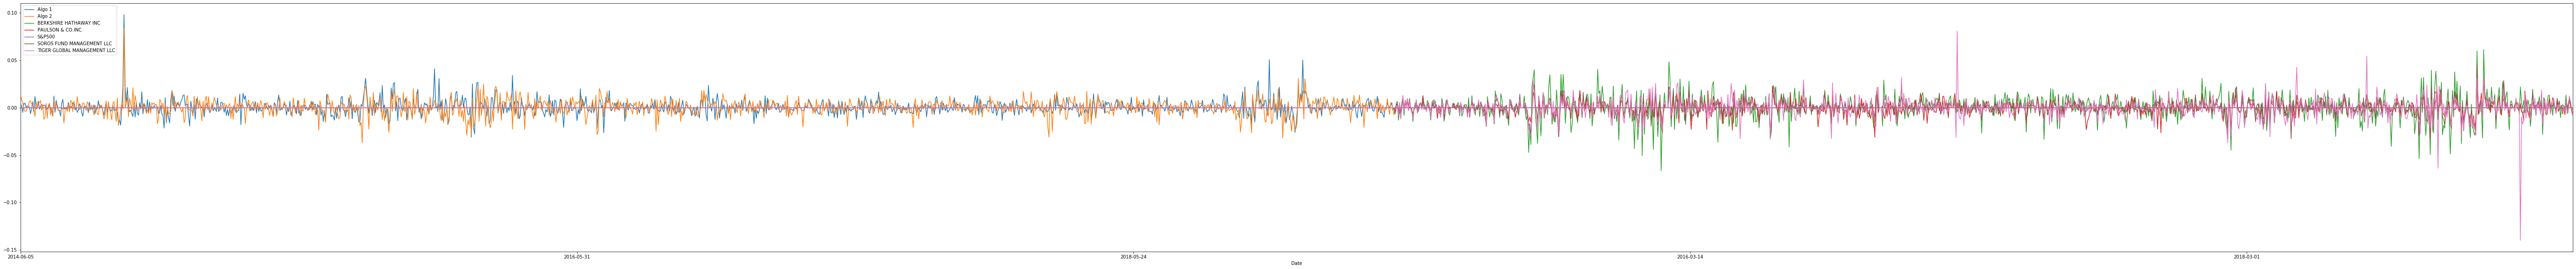

In [38]:
# Plot daily returns
returns_daily.plot(figsize=(100,10))
# [["Algo 1", "Algo 2", "S&P500"]]

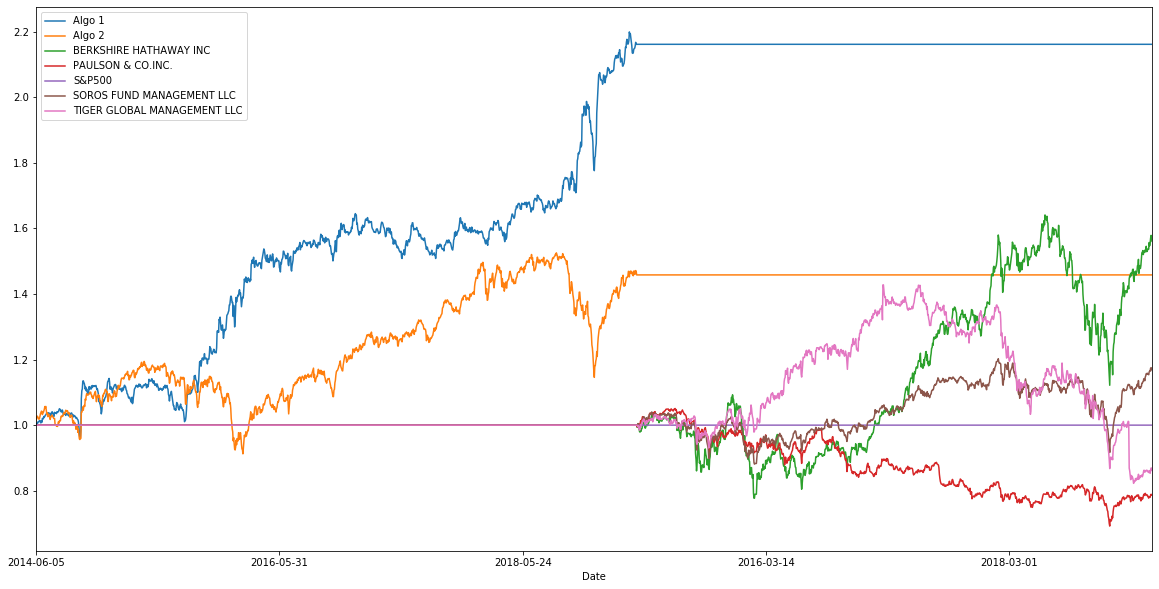

In [67]:
# Plot cumulative returns
cumulative_returns = (1 + returns_daily).cumprod()
cumulative_returns.plot(figsize=(20,10))

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

In [40]:
# Box plot to visually show risk
# YOUR CODE HERE

In [41]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE

In [42]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE

In [43]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calcualte the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

In [44]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
# YOUR CODE HERE

In [45]:
# Correlation
# YOUR CODE HERE

In [46]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# YOUR CODE HERE

### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

In [47]:
# (OPTIONAL) YOUR CODE HERE

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [48]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

In [49]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [50]:
# Read the first stock
# YOUR CODE HERE

In [51]:
# Read the second stock
# YOUR CODE HERE

In [52]:
# Read the third stock
# YOUR CODE HERE

In [53]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE

In [54]:
# Reset the index
# YOUR CODE HERE

In [55]:
# Pivot the Data so that the stock tickers are the columns, the dates are the index, and the 
# values are the closing prices
# YOUR CODE HERE

In [56]:
# Drop Nulls
# YOUR CODE HERE

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [57]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [58]:
# YOUR CODE HERE

In [59]:
# Only compare dates where the new, custom portfolio has dates
# YOUR CODE HERE

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [60]:
# Risk
# YOUR CODE HERE

In [61]:
# Rolling
# YOUR CODE HERE

In [62]:
# Beta
# YOUR CODE HERE

In [63]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE

In [64]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE

## Include correlation analysis to determine which stocks (if any) are correlated

In [65]:
# YOUR CODE HERE